<a href="https://colab.research.google.com/github/AnandKhandekar/BDA-Gelman-Solved-Exercises/blob/main/PDA_Gelman_solutions_Ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 : Bayesian Data analysis
##  Exercise Numerical solved in PyMC3




---


**Numerical 2.1 :** Posterior inference: suppose you have a Beta(4, 4) prior distribution on the probability !
that a coin will yield a ‘head’ when spun in a specified manner. The coin is independently
spun ten times, and ‘heads’ appear fewer than 3 times. You are not told how many heads
were seen, only that the number is less than 3. Calculate your exact posterior density
(up to a proportionality constant) for ! and sketch it.

---



In [43]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss




$prior$ $density$ $\propto$ $\theta^4$ $(1-\theta)^4$ 

$Likelihood$  $:$   

$Pr(data | \theta)$ = $\left( \begin{array}{c} 10 \\ 0 \end{array} \right)$ $(1-\theta)^{10}$ + $\left( \begin{array}{c} 10 \\ 1 \end{array} \right)$ $\theta$$(1-\theta)^9$ + $\left( \begin{array}{c} 10 \\ 2 \end{array} \right)$ $\theta^2$$(1-\theta)^8$

$Posterior Density :$ $\propto$ $\theta^4$ $(1-\theta)^{14}$ + $10\theta^5$ $(1-\theta)^{13}$ + $45\theta^6$ $(1-\theta)^{12}$


In [ ]:
theta = np.arange(0,1,0.01)
dens = np.power(theta,4)*np.power((1-theta),14) + 10*np.power(theta,5)*np.power((1-theta),13)+ 45*np.power(theta,6)*np.power((1-theta),12)
print(dens)

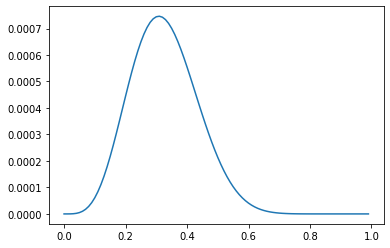

In [ ]:
plt.plot(theta,dens)



---
**Numerical 3.a**
let y be the number of 6’s in 1000 rolls of a fair die.
(a) Sketch the approximate distribution of y, based on the normal approximation



---




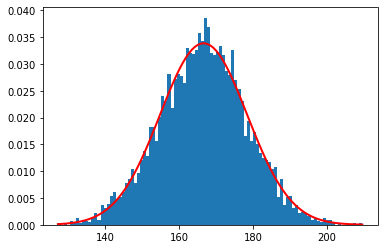

In [ ]:
y = np.arange(120,220,0.5)
mu = 1000*(1/6)
sigma = np.sqrt(1000*(1/6)*(5/6))

dens = np.random.normal(mu, sigma, 5000)
count, bins, ignored = plt.hist(dens, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()




---
#**Numerical 4 :**



**Predictive distributions:** let y be the number of 
6’s in 1000 independent rolls of a particular
real die, which may be unfair. Let $\theta$ be the probability that the die lands on ‘6.’
Suppose your prior distribution for $\theta$ is as follows:
Pr($\theta$ = 1/12) = 0.25,
Pr($\theta$ = 1/6) = 0.5,
Pr($\theta$ = 1/4) = 0.25

(a) Using the normal approximation for the conditional distributions, p(y|$\theta$), sketch your
approximate prior predictive distribution for y.

(b) Give approximate 5%, 25%, 50%, 75%, and 95% points for the distribution of y. (Be
careful here: y does not have a normal distribution, but you can still use the normal
distribution as part of your analysis.)

In [ ]:
y = np.arange(50,300,1)
print(len(y))

mu1=1000*1/12
sigma1 =  np.sqrt(1000*1/12*(1-1/12))
#def dens(x, theta):
  #return (np.random.normal(x,1000*theta, np.sqrt(1000*theta*(1-theta))))
y1= np.random.normal(1000*1/12, np.sqrt(1000*1/12*(1-1/12)),len(y))
count, bins1, ignored = plt.hist(y1, 100, density=True)
plt.plot(bins1, 1/(sigma1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins1 - mu1)**2 / (2 * sigma1**2) ),
         linewidth=2, color='r')
plt.show()

y2= np.random.normal(1000*1/6, np.sqrt(1000*1/6*(1-1/6)),len(y))
mu2 =1000*1/6
sigma2 =  np.sqrt(1000*1/6*(1-1/6))
count, bins2, ignored = plt.hist(y2, 100, density=True)
plt.plot(bins2, 1/(sigma2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins2 - mu2)**2 / (2 * sigma2**2) ),
         linewidth=2, color='r')
plt.show()

y3= np.random.normal(1000*1/4, np.sqrt(1000*1/4*(1-1/4)),len(y))
mu3 =1000*1/4
sigma3 =  np.sqrt(1000*1/4*(1-1/4))
count3, bins3, ignored = plt.hist(y3, 100, density=True)
plt.plot(bins3,     
         1/(sigma3 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins3 - mu3)**2 / (2 * sigma3**2) ),
         linewidth=2, color='r')
plt.show()





## this below is a simpler way to CONCATENATE all three distributions


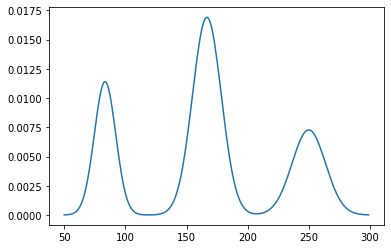

In [44]:
means = 1000*(1/12), 1000*(1/6), 1000*(1/4)
stdevs = np.sqrt(1000*1/12*(1-1/12)),np.sqrt(1000*1/6*(1-1/6)),np.sqrt(1000*1/4*(1-1/4))
weights = 0.25, 0.5, 0.25

x = np.arange(50., 300., 1)

pdfs = [p * ss.norm.pdf(x, mu, sd) for mu, sd, p in zip(means, stdevs, weights)]

density = np.sum(np.array(pdfs), axis=0)
plt.plot(x, density)